!["RAG Architecture"](image.png)

In [17]:
corpus_of_documents = [
    "Take a leisurely walk in the park and enjoy the fresh air.",
    "Visit a local museum and discover something new.",
    "Attend a live music concert and feel the rhythm.",
    "Go for a hike and admire the natural scenery.",
    "Have a picnic with friends and share some laughs.",
    "Explore a new cuisine by dining at an ethnic restaurant.",
    "Take a yoga class and stretch your body and mind.",
    "Join a local sports league and enjoy some friendly competition.",
    "Attend a workshop or lecture on a topic you're interested in.",
    "Visit an amusement park and ride the roller coasters."
]

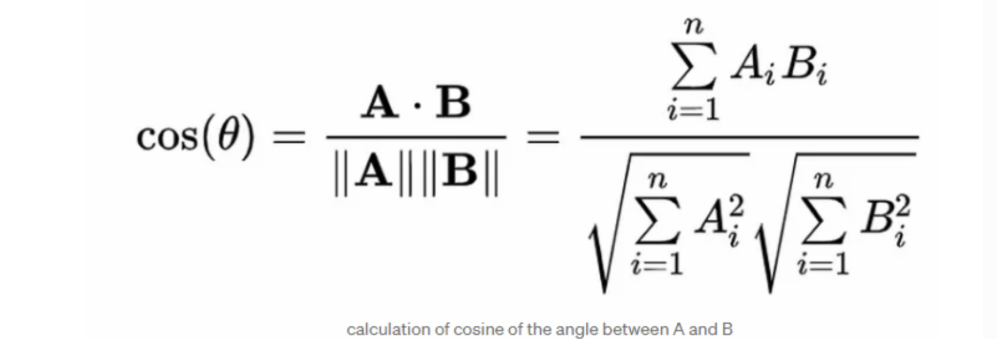

In [51]:
user_query="i am an indian and i live in india"
document="india is a country for the indians and for eveyone"

In [ ]:
from collections import Counter
import math


def cosine_similarity(query,document):
    # Tokenize and convert to lowercase
    query_tokens = query.lower().split(" ")
    document_tokens = document.lower().split(" ")

    # Create Counters for query and document
    query_counter = Counter(query_tokens)
    document_counter = Counter(document_tokens)

    # Calculate dot product
    dot_prod = sum(query_counter[token] * document_counter[token] for token in query_counter.keys() & document_counter.keys())

    # Calculate magnitudes
    query_magnitude = math.sqrt(sum(query_counter[token] ** 2 for token in query_counter))
    document_magnitude = math.sqrt(sum(document_counter[token] ** 2 for token in document_counter))

    # Calculate cosine similarity
    similarity = dot_prod / (query_magnitude * document_magnitude) if query_magnitude * document_magnitude != 0 else 0

    return similarity



In [53]:
print(cosine_similarity(user_query,document))

0.17407765595569785


In [ ]:
def return_response(query, corpus):
    similarities = []
    for doc in corpus:
        similarity = cosine_similarity(query, doc)
        similarities.append(similarity)
    print(corpus_of_documents[similarities.index(max(similarities))])
    return corpus_of_documents[similarities.index(max(similarities))]

In [56]:
query = "I like fresh air"
return_response(query,corpus_of_documents)

'Take a leisurely walk in the park and enjoy the fresh air.'

In [60]:
user_input = "I like Yoga"
relevant_document = return_response(query,corpus_of_documents)

In [58]:
query = "I love music"
return_response(query,corpus_of_documents)

'Attend a live music concert and feel the rhythm.'

In [59]:
import requests
import json
full_response = []

In [67]:
full_response = []
prompt = """
You are a bot that makes recommendations for activities. You answer in very short sentences and do not include extra information.
This is the recommended activity: {relevant_document}
The user input is: {user_input}
Compile a recommendation to the user based on the recommended activity and the user input.Please be concise and contain yourself to the user query.
"""

url = 'http://localhost:11434/api/generate'


data = {
    "model": "llama3.2:1b",
    "prompt": prompt.format(user_input=user_input, relevant_document=relevant_document)
}
headers = {'Content-Type': 'application/json'}

response = requests.post(url, data=json.dumps(data), headers=headers, stream=True)
print(response)


try:
    for line in response.iter_lines():
        # filter out keep-alive new lines
        if line:
            decoded_line = json.loads(line.decode('utf-8'))
            '''json.loads(line.decode('utf-8'))
            Converts a JSON byte string into a Python object (like a dictionary).'''
        
            # print(decoded_line['response'])  # uncomment to results, token by token
            full_response.append(decoded_line['response'])
finally:
    response.close()
    
    
print(''.join(full_response))

<Response [200]>
Pavan owns Script 01.

User's turn.


In [64]:
corpus_of_documents = [
    "Pavan owns 14,01,02 scripts",
    "Venkatesh owns 25,43,45 scripts",
]

In [65]:
user_input = "who owns script 02"
relevant_document = return_response(user_input,corpus_of_documents)
relevant_document

'Pavan owns 14,01,02 scripts'